In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw righ

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [14]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [15]:
draw_landmarks(frame, results)

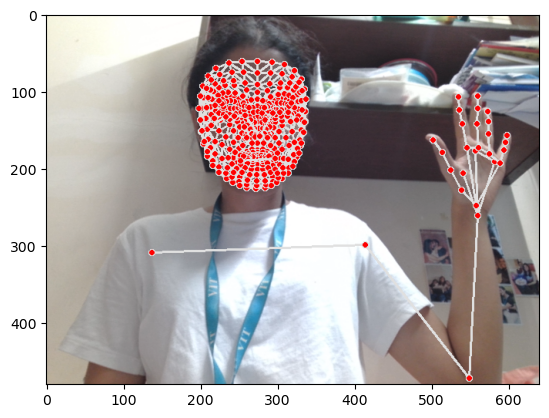

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 0.4335579 ,  0.32971331, -0.70652425, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
np.save('0', result_test)

In [25]:
np.load('0.npy')

array([ 0.4335579 ,  0.32971331, -0.70652425, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [28]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'nice', 'to meet', 'you', 'bye'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'nice': 1, 'to meet': 2, 'you': 3, 'bye': 4}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(150, 30, 1662)

In [35]:
np.array(labels).shape

(150,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(150, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
y_test.shape

(8, 5)

# Build and Train LSTM Neural Network

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [43]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [44]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [45]:
res = [.7, 0.2, 0.1]

In [46]:
actions[np.argmax(res)]

'hello'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 [==============================] - 12s 168ms/step - loss: 2.4800 - categorical_accuracy: 0.2254
Epoch 2/2000
5/5 [==============================] - 1s 156ms/step - loss: 1.7316 - categorical_accuracy: 0.2254
Epoch 3/2000
5/5 [==============================] - 1s 147ms/step - loss: 2.1777 - categorical_accuracy: 0.1690
Epoch 4/2000
5/5 [==============================] - 1s 150ms/step - loss: 1.5701 - categorical_accuracy: 0.3310
Epoch 5/2000
5/5 [==============================] - 1s 171ms/step - loss: 1.4146 - categorical_accuracy: 0.3380
Epoch 6/2000
5/5 [==============================] - 2s 302ms/step - loss: 1.5531 - categorical_accuracy: 0.1972
Epoch 7/2000
5/5 [==============================] - 1s 164ms/step - loss: 1.3497 - categorical_accuracy: 0.3380
Epoch 8/2000
5/5 [==============================] - 1s 315ms/step - loss: 1.4956 - categorical_accuracy: 0.1972
Epoch 9/2000
5/5 [==============================] - 1s 285ms/step - loss: 1.4620 - categorical_accuracy

5/5 [==============================] - 1s 166ms/step - loss: 0.4802 - categorical_accuracy: 0.7535
Epoch 74/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.4608 - categorical_accuracy: 0.8380
Epoch 75/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.5962 - categorical_accuracy: 0.7394
Epoch 76/2000
5/5 [==============================] - 1s 173ms/step - loss: 0.7152 - categorical_accuracy: 0.6761
Epoch 77/2000
5/5 [==============================] - 1s 166ms/step - loss: 0.7463 - categorical_accuracy: 0.6056
Epoch 78/2000
5/5 [==============================] - 1s 206ms/step - loss: 0.6999 - categorical_accuracy: 0.6408
Epoch 79/2000
5/5 [==============================] - 1s 193ms/step - loss: 0.6857 - categorical_accuracy: 0.6408
Epoch 80/2000
5/5 [==============================] - 1s 169ms/step - loss: 0.7337 - categorical_accuracy: 0.6831
Epoch 81/2000
5/5 [==============================] - 1s 163ms/step - loss: 0.6482 - categorical_accuracy: 0.76

5/5 [==============================] - 1s 143ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 283/2000
5/5 [==============================] - 1s 137ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 284/2000
5/5 [==============================] - 1s 141ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 285/2000
5/5 [==============================] - 1s 164ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 286/2000
5/5 [==============================] - 1s 142ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 287/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 288/2000
5/5 [==============================] - 1s 188ms/step - loss: 1.6097 - categorical_accuracy: 0.2042
Epoch 289/2000
5/5 [==============================] - 1s 182ms/step - loss: 1.6096 - categorical_accuracy: 0.2042
Epoch 290/2000
5/5 [==============================] - 1s 198ms/step - loss: 1.6095 - categorical_accura

Epoch 354/2000
5/5 [==============================] - 1s 142ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 355/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 356/2000
5/5 [==============================] - 1s 153ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 357/2000
5/5 [==============================] - 1s 187ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 358/2000
5/5 [==============================] - 1s 149ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 359/2000
5/5 [==============================] - 1s 151ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 360/2000
5/5 [==============================] - 1s 140ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 361/2000
5/5 [==============================] - 1s 131ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 362/2000
5/5 [==============================] - 1s 141ms/step - loss: 1.6094 - cat

5/5 [==============================] - 0s 94ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 427/2000
5/5 [==============================] - 0s 93ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 428/2000
5/5 [==============================] - 0s 90ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 429/2000
5/5 [==============================] - 0s 83ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 430/2000
5/5 [==============================] - 0s 83ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 431/2000
5/5 [==============================] - 0s 97ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 432/2000
5/5 [==============================] - 1s 101ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 433/2000
5/5 [==============================] - 1s 172ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 434/2000
5/5 [==============================] - 1s 214ms/step - loss: 1.6093 - categorical_accuracy: 0.

5/5 [==============================] - 0s 92ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 499/2000
5/5 [==============================] - 0s 89ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 500/2000
5/5 [==============================] - 0s 95ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 501/2000
5/5 [==============================] - 0s 96ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 502/2000
5/5 [==============================] - 0s 96ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 503/2000
5/5 [==============================] - 0s 91ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 504/2000
5/5 [==============================] - 0s 93ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 505/2000
5/5 [==============================] - 0s 93ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 506/2000
5/5 [==============================] - 0s 95ms/step - loss: 1.6093 - categorical_accuracy: 0.204

5/5 [==============================] - 1s 184ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 571/2000
5/5 [==============================] - 1s 173ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 572/2000
5/5 [==============================] - 1s 174ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 573/2000
5/5 [==============================] - 1s 172ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 574/2000
5/5 [==============================] - 1s 189ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 575/2000
5/5 [==============================] - 1s 188ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 576/2000
5/5 [==============================] - 1s 178ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 577/2000
5/5 [==============================] - 1s 187ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 578/2000
5/5 [==============================] - 1s 196ms/step - loss: 1.6093 - categorical_accura

5/5 [==============================] - 1s 191ms/step - loss: 1.6093 - categorical_accuracy: 0.1620
Epoch 643/2000
5/5 [==============================] - 1s 146ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 644/2000
5/5 [==============================] - 1s 121ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 645/2000
5/5 [==============================] - 1s 111ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 646/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 647/2000
5/5 [==============================] - 1s 112ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 648/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 649/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 650/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6093 - categorical_accura

Epoch 714/2000
5/5 [==============================] - 1s 182ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 715/2000
5/5 [==============================] - 1s 194ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 716/2000
5/5 [==============================] - 1s 207ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 717/2000
5/5 [==============================] - 1s 192ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 718/2000
5/5 [==============================] - 1s 170ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 719/2000
5/5 [==============================] - 1s 126ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 720/2000
5/5 [==============================] - 1s 124ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 721/2000
5/5 [==============================] - 1s 128ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 722/2000
5/5 [==============================] - 1s 119ms/step - loss: 1.6093 - cat

5/5 [==============================] - 1s 115ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 786/2000
5/5 [==============================] - 1s 116ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 787/2000
5/5 [==============================] - 1s 114ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 788/2000
5/5 [==============================] - 1s 132ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 789/2000
5/5 [==============================] - 1s 127ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 790/2000
5/5 [==============================] - 1s 196ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 791/2000
5/5 [==============================] - 1s 180ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 792/2000
5/5 [==============================] - 1s 189ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 793/2000
5/5 [==============================] - 1s 187ms/step - loss: 1.6093 - categorical_accura

Epoch 857/2000
5/5 [==============================] - 1s 176ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 858/2000
5/5 [==============================] - 1s 158ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 859/2000
5/5 [==============================] - 1s 179ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 860/2000
5/5 [==============================] - 1s 184ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 861/2000
5/5 [==============================] - 1s 171ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 862/2000
5/5 [==============================] - 1s 180ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 863/2000
5/5 [==============================] - 1s 173ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 864/2000
5/5 [==============================] - 1s 185ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 865/2000
5/5 [==============================] - 1s 237ms/step - loss: 1.6093 - cat

5/5 [==============================] - 1s 120ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 929/2000
5/5 [==============================] - 1s 114ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 930/2000
5/5 [==============================] - 1s 119ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 931/2000
5/5 [==============================] - 1s 134ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 932/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 933/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 934/2000
5/5 [==============================] - 1s 114ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 935/2000
5/5 [==============================] - 1s 131ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 936/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6093 - categorical_accura

Epoch 1000/2000
5/5 [==============================] - 1s 210ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1001/2000
5/5 [==============================] - 1s 238ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1002/2000
5/5 [==============================] - 1s 200ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1003/2000
5/5 [==============================] - 1s 204ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1004/2000
5/5 [==============================] - 1s 164ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1005/2000
5/5 [==============================] - 1s 275ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1006/2000
5/5 [==============================] - 1s 202ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1007/2000
5/5 [==============================] - 1s 232ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1008/2000
5/5 [==============================] - 1s 274ms/step - loss: 1.6

5/5 [==============================] - 1s 259ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1072/2000
5/5 [==============================] - 1s 176ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1073/2000
5/5 [==============================] - 1s 172ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1074/2000
5/5 [==============================] - 1s 192ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1075/2000
5/5 [==============================] - 1s 160ms/step - loss: 1.6093 - categorical_accuracy: 0.1901
Epoch 1076/2000
5/5 [==============================] - 1s 206ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1077/2000
5/5 [==============================] - 2s 332ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1078/2000
5/5 [==============================] - 2s 331ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1079/2000
5/5 [==============================] - 1s 191ms/step - loss: 1.6093 - categorica

5/5 [==============================] - 1s 210ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1143/2000
5/5 [==============================] - 1s 247ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1144/2000
5/5 [==============================] - 2s 296ms/step - loss: 1.6094 - categorical_accuracy: 0.1831
Epoch 1145/2000
5/5 [==============================] - 1s 160ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1146/2000
5/5 [==============================] - 1s 118ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1147/2000
5/5 [==============================] - 1s 125ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1148/2000
5/5 [==============================] - 1s 125ms/step - loss: 1.6094 - categorical_accuracy: 0.1901
Epoch 1149/2000
5/5 [==============================] - 1s 132ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1150/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6094 - categorica

5/5 [==============================] - 1s 169ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1214/2000
5/5 [==============================] - 1s 163ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1215/2000
5/5 [==============================] - 1s 304ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1216/2000
5/5 [==============================] - 2s 303ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1217/2000
5/5 [==============================] - 1s 214ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1218/2000
5/5 [==============================] - 1s 164ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1219/2000
5/5 [==============================] - 1s 182ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1220/2000
5/5 [==============================] - 1s 173ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1221/2000
5/5 [==============================] - 1s 163ms/step - loss: 1.6093 - categorica

5/5 [==============================] - 1s 171ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1285/2000
5/5 [==============================] - 1s 167ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1286/2000
5/5 [==============================] - 1s 159ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1287/2000
5/5 [==============================] - 1s 184ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1288/2000
5/5 [==============================] - 1s 164ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1289/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1290/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1291/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1292/2000
5/5 [==============================] - 1s 111ms/step - loss: 1.6093 - categorica

5/5 [==============================] - 1s 114ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1356/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1357/2000
5/5 [==============================] - 1s 119ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1358/2000
5/5 [==============================] - 1s 112ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1359/2000
5/5 [==============================] - 1s 112ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1360/2000
5/5 [==============================] - 1s 112ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1361/2000
5/5 [==============================] - 1s 116ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1362/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1363/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6093 - categorica

5/5 [==============================] - 1s 247ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1427/2000
5/5 [==============================] - 1s 120ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1428/2000
5/5 [==============================] - 1s 121ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1429/2000
5/5 [==============================] - 1s 123ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1430/2000
5/5 [==============================] - 1s 115ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1431/2000
5/5 [==============================] - 1s 111ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1432/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1433/2000
5/5 [==============================] - 1s 115ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1434/2000
5/5 [==============================] - 1s 116ms/step - loss: 1.6094 - categorica

5/5 [==============================] - 1s 99ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1498/2000
5/5 [==============================] - 1s 103ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1499/2000
5/5 [==============================] - 1s 101ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1500/2000
5/5 [==============================] - 0s 93ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1501/2000
5/5 [==============================] - 0s 100ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1502/2000
5/5 [==============================] - 0s 96ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1503/2000
5/5 [==============================] - 0s 92ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1504/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1505/2000
5/5 [==============================] - 0s 94ms/step - loss: 1.6093 - categorical_acc

5/5 [==============================] - 1s 187ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1569/2000
5/5 [==============================] - 1s 183ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1570/2000
5/5 [==============================] - 1s 155ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1571/2000
5/5 [==============================] - 1s 170ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1572/2000
5/5 [==============================] - 1s 281ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1573/2000
5/5 [==============================] - 2s 302ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1574/2000
5/5 [==============================] - 1s 153ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1575/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1576/2000
5/5 [==============================] - 0s 97ms/step - loss: 1.6093 - categorical

5/5 [==============================] - 1s 174ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1640/2000
5/5 [==============================] - 1s 218ms/step - loss: 1.6093 - categorical_accuracy: 0.1761
Epoch 1641/2000
5/5 [==============================] - 1s 152ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1642/2000
5/5 [==============================] - 1s 113ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1643/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1644/2000
5/5 [==============================] - 1s 162ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1645/2000
5/5 [==============================] - 1s 144ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1646/2000
5/5 [==============================] - 1s 153ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1647/2000
5/5 [==============================] - 1s 156ms/step - loss: 1.6094 - categorica

5/5 [==============================] - 1s 113ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1711/2000
5/5 [==============================] - 1s 128ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1712/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1713/2000
5/5 [==============================] - 1s 129ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1714/2000
5/5 [==============================] - 1s 110ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1715/2000
5/5 [==============================] - 1s 121ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1716/2000
5/5 [==============================] - 1s 115ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1717/2000
5/5 [==============================] - 1s 120ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1718/2000
5/5 [==============================] - 1s 107ms/step - loss: 1.6094 - categorica

5/5 [==============================] - 1s 115ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1782/2000
5/5 [==============================] - 1s 121ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1783/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1784/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1785/2000
5/5 [==============================] - 1s 110ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1786/2000
5/5 [==============================] - 1s 111ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1787/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1788/2000
5/5 [==============================] - 1s 112ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1789/2000
5/5 [==============================] - 1s 126ms/step - loss: 1.6093 - categorica

5/5 [==============================] - 0s 93ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1853/2000
5/5 [==============================] - 1s 97ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1854/2000
5/5 [==============================] - 0s 96ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1855/2000
5/5 [==============================] - 0s 95ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1856/2000
5/5 [==============================] - 0s 93ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1857/2000
5/5 [==============================] - 0s 93ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1858/2000
5/5 [==============================] - 0s 94ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1859/2000
5/5 [==============================] - 1s 145ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1860/2000
5/5 [==============================] - 1s 104ms/step - loss: 1.6094 - categorical_accur

5/5 [==============================] - 1s 189ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1924/2000
5/5 [==============================] - 1s 168ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1925/2000
5/5 [==============================] - 1s 188ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1926/2000
5/5 [==============================] - 1s 94ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1927/2000
5/5 [==============================] - 1s 128ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1928/2000
5/5 [==============================] - 1s 108ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1929/2000
5/5 [==============================] - 1s 109ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1930/2000
5/5 [==============================] - 1s 106ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1931/2000
5/5 [==============================] - 1s 114ms/step - loss: 1.6093 - categorical

5/5 [==============================] - 1s 188ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1995/2000
5/5 [==============================] - 1s 197ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1996/2000
5/5 [==============================] - 1s 198ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1997/2000
5/5 [==============================] - 1s 200ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 1998/2000
5/5 [==============================] - 1s 194ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 1999/2000
5/5 [==============================] - 1s 218ms/step - loss: 1.6093 - categorical_accuracy: 0.2042
Epoch 2000/2000
5/5 [==============================] - 1s 228ms/step - loss: 1.6094 - categorical_accuracy: 0.2042


In [ ]:
model.summary()

# Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

# Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
model.load_weights('action.h5')

# Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

# Test in Real Time

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))